In [1]:
'''
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = "/net/projects/cmap/workspaces/Output_River_Shapefile/Output_River_Shapefile.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the shapefile
display(gdf.head())

# Plot the shapefile using geopandas
gdf.plot(figsize=(10, 10))
plt.title("Shapefile Plot")
plt.show()'''

'\nimport geopandas as gpd\nimport matplotlib.pyplot as plt\n\nshapefile_path = "/net/projects/cmap/workspaces/Output_River_Shapefile/Output_River_Shapefile.shp"\n\n# Load the shapefile using geopandas\ngdf = gpd.read_file(shapefile_path)\n\n# Display the first few rows of the shapefile\ndisplay(gdf.head())\n\n# Plot the shapefile using geopandas\ngdf.plot(figsize=(10, 10))\nplt.title("Shapefile Plot")\nplt.show()'

look at input file: open water layer

# Inspect Open Water Layer Zip File

In [2]:
import zipfile
import io
import geopandas as gpd

# Path to your ZIP file
zip_path = "/net/projects/cmap/data/kane-county-data/Kane_Co_Open_Water_Layer.zip"

# Open the ZIP file in memory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Find the .gpkg (or relevant geospatial file) within the zip
    for file_info in zip_ref.infolist():
        if file_info.filename.endswith('.gpkg'):
            # Open the .gpkg file as a file-like object in memory
            with zip_ref.open(file_info) as file:
                # Read the .gpkg data into a GeoDataFrame directly from the file object
                gdf = gpd.read_file(file)

# Now you can inspect the GeoDataFrame
print(gdf.head())

# Optionally, plot the data
gdf.plot()


NameError: name 'gdf' is not defined

# Load + Explore the River Dataset

In [4]:
import torch
from torchgeo.datasets import BoundingBox
from rd import RiverDataset
import sys

# Assume 'path_to_data.gpkg' is the path to your geospatial data file
path = "/net/projects/cmap/data/kane-county-data/Kane_Co_Open_Water_Layer.zip"

# Configuration for the dataset
labels = {
    "STREAM/RIVER": 1  # Label for rivers and streams in the dataset
}
patch_size = 256  # Size of the patches to be extracted
# check the patch vs chip size
dest_crs = "EPSG:4326"  # Desired Coordinate Reference System (WGS84)
resolution = 0.0001  # Spatial resolution of the dataset

configs = (labels, patch_size, dest_crs, resolution)

# Create an instance of the RiverDataset
river_dataset = RiverDataset(path, configs)

# Example bounding box query (minx, maxx, miny, maxy, mint, maxt)
# Adjusted to fit within the dataset bounds
bbox = BoundingBox(
    minx=-89.6,       # Adjusted within the dataset minx
    maxx=-87.2,       # Adjusted within the dataset maxx
    miny=40.72,       # Adjusted within the dataset miny
    maxy=43.18,       # Adjusted within the dataset maxy
    mint=0,           # Optional: you can leave this as is
    maxt=sys.maxsize  # Optional: you can leave this as is
)

# Fetch data for this bounding box
try:
    sample = river_dataset[bbox]
    # Print the sample (mask, CRS, bounding box)
    print("Mask shape:", sample['mask'].shape)
    print("CRS:", sample['crs'])
    print("Bounding Box:", sample['bbox'])
except IndexError as e:
    print(f"Error: {e}")

# reduce patch size --> # index goes up

Initial GeoDataFrame loaded:
   OBJECTID_1  OBJECTID         FCODE AddUser AddDate      EditUser  \
0           3         3     LAKE/POND    None    None  EDITORGISJCV   
1           4         4     LAKE/POND    None    None  EDITORGISJCV   
2           5         5     LAKE/POND    None    None  EDITORGISJCV   
3           6         6     LAKE/POND    None    None  EDITORGISJCV   
4           7         7  STREAM/RIVER    None    None          None   

     EditDate    Shape_STAr   Shape_STLe  \
0  2021-09-23  19202.263858   553.773198   
1  2017-11-02  93650.125726  1150.204623   
2  2017-11-02  28447.559086  1017.527238   
3  2017-11-02  22350.795461   779.240851   
4        None  11726.041740  1275.191296   

                                            geometry  
0  POLYGON ((1000903.661 1847211.970, 1000899.841...  
1  POLYGON ((1000295.575 1846736.918, 1000286.206...  
2  POLYGON ((1000884.503 1846937.163, 1000893.378...  
3  POLYGON ((1001358.114 1846711.121, 1001361.239...  
4  P

Populating index: 100%|██████████| 176/176 [00:08<00:00, 19.60it/s]


Initializing RiverDataset with configs: ({'STREAM/RIVER': 1}, 256, 'EPSG:4326', 0.0001)
Mask shape: torch.Size([24600, 24000])
CRS: EPSG:4326
Bounding Box: BoundingBox(minx=-89.6, maxx=-87.2, miny=40.72, maxy=43.18, mint=0, maxt=9223372036854775807)


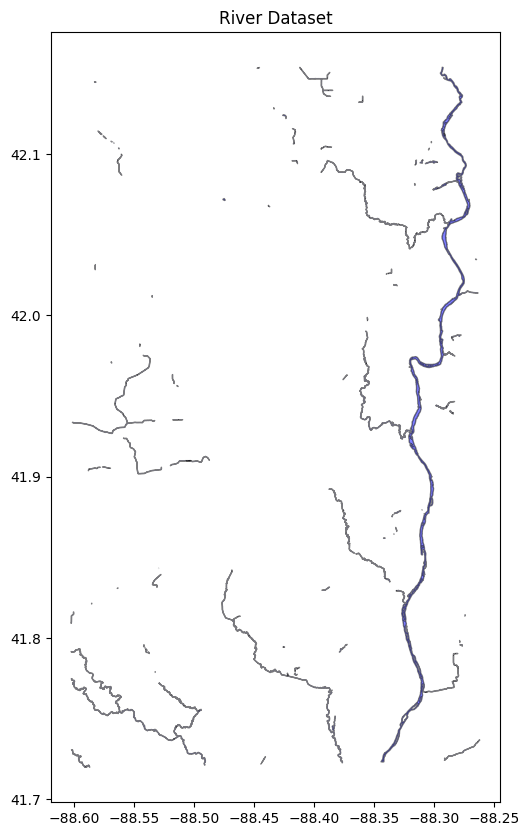

In [9]:
ax = river_dataset.gdf.plot(figsize=(10, 10), color='blue', alpha=0.5, edgecolor='k')
plt.title('River Dataset')
plt.show()

In [10]:
type(river_dataset.gdf.iloc[0])

pandas.core.series.Series

In [11]:
river_dataset.gdf.head(2)

,OBJECTID_1,OBJECTID,FCODE,AddUser,AddDate,EditUser,EditDate,Shape_STAr,Shape_STLe,geometry
4,7,7,STREAM/RIVER,None,None,None,None,11726.041740,1275.191296,"POLYGON ((-88.26169 41.73687, -88.26169 41.736..."
6,9,9,STREAM/RIVER,None,None,None,None,212818.638366,19090.189595,"POLYGON ((-88.28127 41.72802, -88.28127 41.728..."


## What does each row of the gdf look like?

/tmp/ipykernel_3271384/1549596160.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


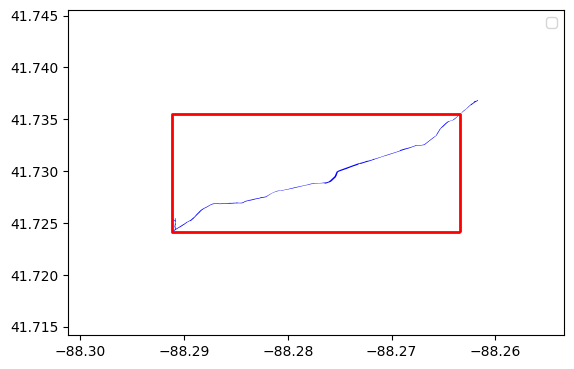

In [25]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Select the first row (or any row of your choice) from river_dataset.gdf
row_geometry = river_dataset.gdf.geometry.iloc[1]

# Get the bounding box (minx, miny, maxx, maxy) of the geometry
minx, miny, maxx, maxy = row_geometry.bounds

# Create a Polygon from the bounding box
bbox = box(minx, miny, maxx, maxy)

# Create a GeoDataFrame for the bounding box (to plot)
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox])

# Plot the original geometry and its bounding box
fig, ax = plt.subplots()

# Plot both the geometry and bounding box
river_dataset.gdf.plot(ax=ax, color='blue', marker='o', label='Original Geometry')
bbox_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Bounding Box')

# Set equal aspect ratio
ax.set_aspect('equal')

# Zoom to the bounding box extent by setting axis limits
ax.set_xlim([minx - 0.01, maxx + 0.01])
ax.set_ylim([miny - 0.01, maxy + 0.01])

plt.legend()
plt.show()


In [33]:
# Assuming 'row_geometry' is a geometry object from the GeoDataFrame
row_geometry = river_dataset.gdf.geometry.iloc[0]

# List all methods and attributes available for the geometry
methods = dir(row_geometry)
print(methods)


['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'line_locate_point', 

In [16]:
print("Dataset Bounds:", river_dataset.bounds)

Dataset Bounds: BoundingBox(minx=-89.60247504118747, maxx=-87.23767873853359, miny=40.71979852550066, maxy=43.17920539923875, mint=0.0, maxt=9.223372036854776e+18)


In [21]:
# Calculate lengths and areas
river_lengths = river_dataset.gdf.geometry.length  # Lengths in the units of the CRS
river_areas = river_dataset.gdf.geometry.area      # Areas in the units of the CRS

# Add lengths and areas to the GeoDataFrame
river_dataset.gdf['length'] = river_lengths
river_dataset.gdf['area'] = river_areas

# Summary statistics
print(river_dataset.gdf[['length', 'area']].describe())


           length          area
count  176.000000  1.760000e+02
mean     0.031831  5.563998e-06
std      0.171358  6.218788e-05
min      0.000006  2.876795e-13
25%      0.001196  3.587285e-08
50%      0.004258  1.494944e-07
75%      0.013419  5.981931e-07
max      2.092983  8.245790e-04


/tmp/ipykernel_962487/519197894.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river_lengths = river_dataset.gdf.geometry.length  # Lengths in the units of the CRS
/tmp/ipykernel_962487/519197894.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river_areas = river_dataset.gdf.geometry.area      # Areas in the units of the CRS


In [30]:
import torch
from torchgeo.datasets import BoundingBox
from kc import KaneCounty
import sys
import os

# Load the configuration settings
DATA_ROOT = "/net/projects/cmap/data"
KC_SHAPE_ROOT = os.path.join(DATA_ROOT, "kane-county-data")
KC_SHAPE_FILENAME = "KC_StormwaterDataJan2024.gdb.zip"  # Filename from config
KC_LAYER = 4  # Layer number from config
KC_LABELS = {
    "BACKGROUND": 0,
    "POND": 1,
    "WETLAND": 2,
    "DRY BOTTOM - TURF": 3,
    "DRY BOTTOM - MESIC PRAIRIE": 4,
}

# Assume the full path to the GeoPackage
path = os.path.join(KC_SHAPE_ROOT, KC_SHAPE_FILENAME)

# Configuration for the dataset
labels = KC_LABELS
patch_size = 256  # Size of the patches to be extracted
dest_crs = "EPSG:4326"  # Desired Coordinate Reference System (WGS84)
resolution = 0.0001  # Spatial resolution of the dataset

# Update configs to include the layer name
configs = (KC_LAYER, labels, patch_size, dest_crs, resolution)

# Create an instance of the KaneCounty dataset
kc_dataset = KaneCounty(path, configs)

# Example bounding box query (minx, maxx, miny, maxy, mint, maxt)
# Adjusted to fit within the dataset bounds
bbox = BoundingBox(
    minx=-89.6,       # Adjusted within the dataset minx
    maxx=-87.2,       # Adjusted within the dataset maxx
    miny=40.72,       # Adjusted within the dataset miny
    maxy=43.18,       # Adjusted within the dataset maxy
    mint=0,           # Optional: you can leave this as is
    maxt=sys.maxsize  # Optional: you can leave this as is
)

# Fetch data for this bounding box
try:
    sample = kc_dataset[bbox]  # Fetch sample for the bounding box
    # Print the sample (mask, CRS, bounding box)
    print("Mask shape:", sample['mask'].shape)
    print("CRS:", sample['crs'])
    print("Bounding Box:", sample['bbox'])
except IndexError as e:
    print(f"Error: {e}")


Initial Kane County GeoDataFrame loaded:
           BasinType                                           geometry
0               POND  MULTIPOLYGON (((945992.273 1935539.526, 945981...
1  DRY BOTTOM - TURF  MULTIPOLYGON (((957439.997 1930555.492, 957416...
2               POND  MULTIPOLYGON (((947040.816 1927034.962, 947028...
3               POND  MULTIPOLYGON (((948408.045 1926341.826, 948397...
4               POND  MULTIPOLYGON (((947424.509 1925889.426, 947443...
Kane countys filtered gdf
           BasinType                                           geometry
0               POND  MULTIPOLYGON (((-88.47404 41.98057, -88.47408 ...
1  DRY BOTTOM - TURF  MULTIPOLYGON (((-88.43192 41.96693, -88.43200 ...
2               POND  MULTIPOLYGON (((-88.47013 41.95723, -88.47018 ...
3               POND  MULTIPOLYGON (((-88.46510 41.95534, -88.46514 ...
4               POND  MULTIPOLYGON (((-88.46872 41.95409, -88.46865 ...
Mask shape: torch.Size([24600, 24000])
CRS: EPSG:4326
Bounding Box: B

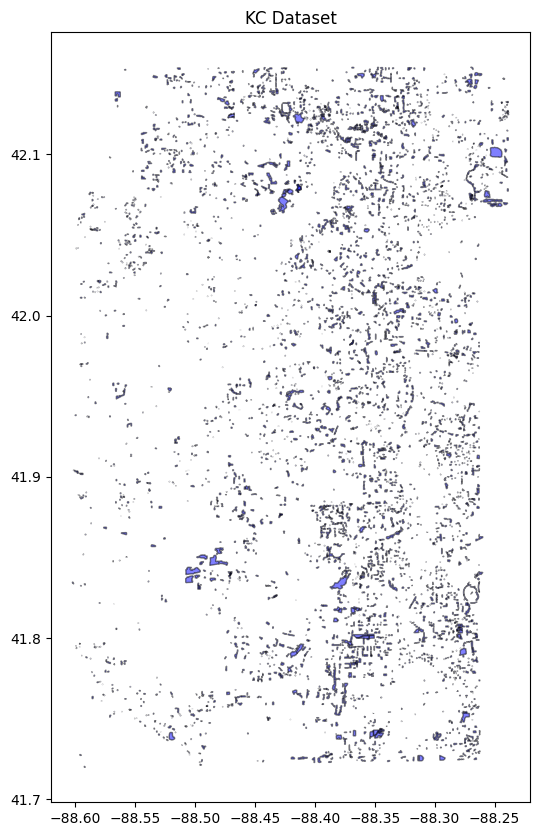

In [31]:
ax = kc_dataset.gdf.plot(figsize=(10, 10), color='blue', alpha=0.5, edgecolor='k')
plt.title('KC Dataset')
plt.show()

/tmp/ipykernel_962487/3597410549.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


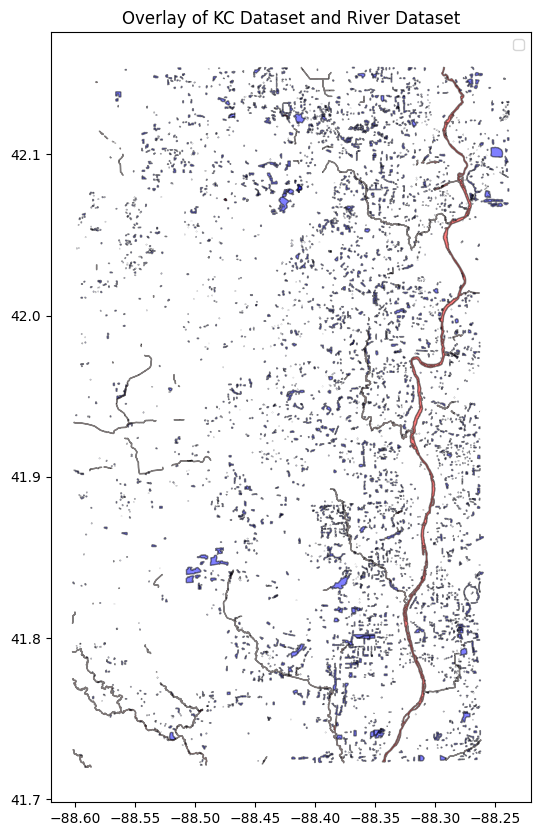

In [54]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the KC dataset
kc_dataset.gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='KC Dataset')

# Plot the river dataset on the same axis
river_dataset.gdf.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', label='River Dataset')

# Add title and legend
plt.title('Overlay of KC Dataset and River Dataset')
plt.legend()
plt.show()


In [ ]:
# don't plot gdf; plot combined dataset
# need to confirm that we can get bbox from combined dataset so we can get river/kc both

# Training Outputs

In [41]:
shapefile_path = "/net/projects/cmap/workspaces/annapoon/trial_test_run_3_trial0/test-images/epoch-4/POND"
contents = os.listdir(shapefile_path)

# Print the contents
for item in contents:
    print(item)

test_sample-4.0.8.png
test_sample-4.0.10.png
test_sample-4.0.9.png
test_sample-4.0.0.png
test_sample-4.0.12.png
test_sample-4.0.3.png
test_sample-4.0.4.png
test_sample-4.0.2.png


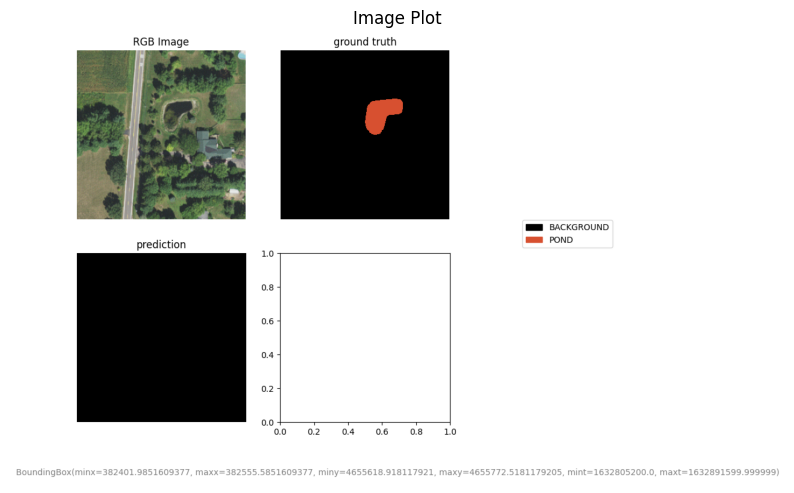

In [50]:
import geopandas as gpd
import matplotlib.image as mpimg

image_path = "/net/projects/cmap/workspaces/annapoon/trial_test_run_3_trial0/test-images/epoch-4/POND/test_sample-4.0.0.png"

img = mpimg.imread(image_path)

# Display
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.title("Image Plot")
plt.show()

In [46]:
shapefile_path = "/net/projects/cmap/workspaces/annapoon/trial_test_run_3_trial0/test-images/epoch-4/WETLAND"
contents = os.listdir(shapefile_path)

# Print the contents
for item in contents:
    print(item)

test_sample-4.0.6.png
test_sample-4.0.11.png
test_sample-4.0.10.png


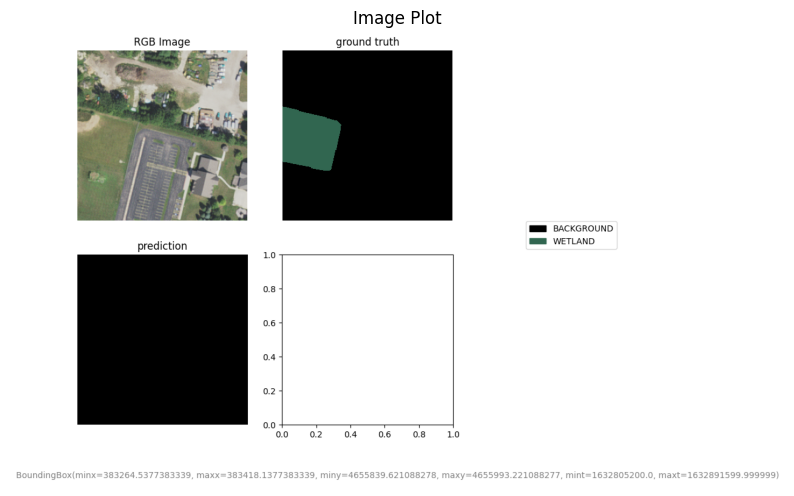

In [49]:
import geopandas as gpd
import matplotlib.image as mpimg

image_path = "/net/projects/cmap/workspaces/annapoon/trial_test_run_3_trial0/test-images/epoch-4/WETLAND/test_sample-4.0.11.png"

# Load the image
img = mpimg.imread(image_path)

# Display 
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.title("Image Plot")
plt.show()